In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy
import PIL
import requests
import plotly as ply


In [23]:
# The relative path of the stroke_positive csv dataset is saved into the variable data for ease of use. 
# It contains only the data of stroke positve patients.
data = '../data/processed/patients_with_stroke.csv'

# The data is read and saved in a variable (stroke_positive)
stroke_positive_all_ages = pd.read_csv(data)

# Removing all stroke positive patients under the age of 18 years
stroke_positive = stroke_positive_all_ages[stroke_positive_all_ages['age'] >= 18]

# This data set is only comprised of patients who have suffered a stroke and are over the age of 18+ (Adult)
stroke_positive = pd.DataFrame(stroke_positive)


stroke_positive

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_category,bmi_category,glucose_category
0,9046,Male,67.0,0,1,Yes,Private,Urban,229,37,formerly smoked,1,Senior,Obesity,Diabetic
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202,34,never smoked,1,Adult,Obesity,Diabetic
2,31112,Male,80.0,0,1,Yes,Private,Rural,106,32,never smoked,1,Senior,Obesity,Healthy
3,60182,Female,49.0,0,0,Yes,Private,Urban,171,34,smokes,1,Adult,Obesity,Pre-Diabetic
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174,24,never smoked,1,Senior,Healthy Weight,Pre-Diabetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,40460,Female,68.0,1,1,Yes,Private,Urban,248,40,formerly smoked,1,Senior,Obesity,Diabetic
244,17739,Male,57.0,0,0,Yes,Private,Rural,85,37,Unknown,1,Adult,Obesity,Healthy
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,79,29,formerly smoked,1,Senior,Overweight,Healthy
247,34060,Male,71.0,1,0,Yes,Self-employed,Rural,88,29,Unknown,1,Senior,Overweight,Healthy


In [24]:
# Obtaining storke_positive df column names in order to build plots
column_names = stroke_positive.columns

print(column_names)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_category', 'bmi_category',
       'glucose_category'],
      dtype='object')


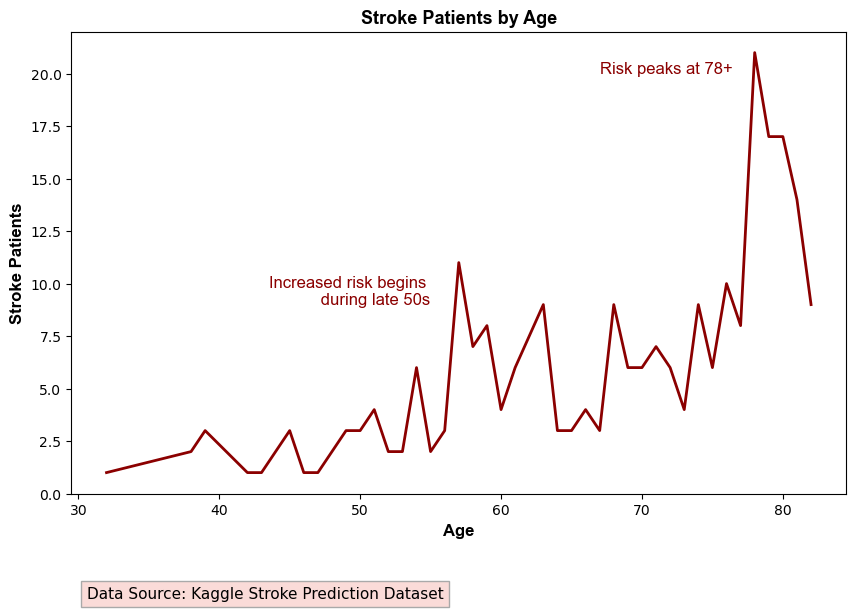

In [25]:
### Code for line plot representing number of stroke patients by age

# Count patients by age (ie. number of patients per age value)
age_counts = stroke_positive['age'].value_counts().sort_index()

# Line plot for count of patients by age
ax= age_counts.plot(kind='line', 
                    color='darkred',
                    linewidth=2, 
                    figsize=(10,6))

# Plot titles and labels formatting
plt.title('Stroke Patients by Age', # Plot title
          fontweight='bold', 
          fontsize='13', 
          fontfamily='arial')
plt.xlabel('Age',  # X-axis label
           fontweight='bold', 
           fontsize='12', 
           fontfamily='arial')
plt.ylabel('Stroke Patients',  #Y-axis label
           fontweight='bold', 
           fontsize='12',
           fontfamily='arial')


# Create an annotation at the highest point on plot to represent peak in data set
ax.annotate(
    'Risk peaks at 78+', # Annotation text
    xy=(78, 20),  # Base point (coordinates) for annoation
    xytext=(67, 20),  # Text positioning from base point
    fontsize=12,
    color='darkred',
    fontfamily='arial',)

# Create an annotation at age 55 to represent notable count increase
ax.annotate(
    'Increased risk begins \n during late 50s',   # Annotation text
    xy=(55, 11),   # Base point (coordinates) for annotation
    xytext=(55, 9),   # Text positioning from base point
    fontsize=12,
    color='darkred',
    ha='right',
    fontfamily='arial',)

# Create text box below plot to indicate data source for data transparency purposes
plt.text(
    0.02, -0.2,  # Text positioning from axes
    'Data Source: Kaggle Stroke Prediction Dataset', # Text
    transform=plt.gca().transAxes,  # place relative to entire figure
    fontsize=11,
    color='black',
    ha='left',  # Horizontal text alignment inside box
    va='top',   # Vertical text alignment inside box
    bbox=dict(  # Box style
        facecolor='#FADBD8',   # Light red background
        edgecolor='darkgrey',    # Border color
        )
)

plt.savefig("../images/Stroke Positive Visualizations/stroke_patients_by_age.png",  # File name
            dpi=300,                       # Resolution
            bbox_inches='tight')           # Fit all content on paper

plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_380\1447118739.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels1, # Format x-axis category labels


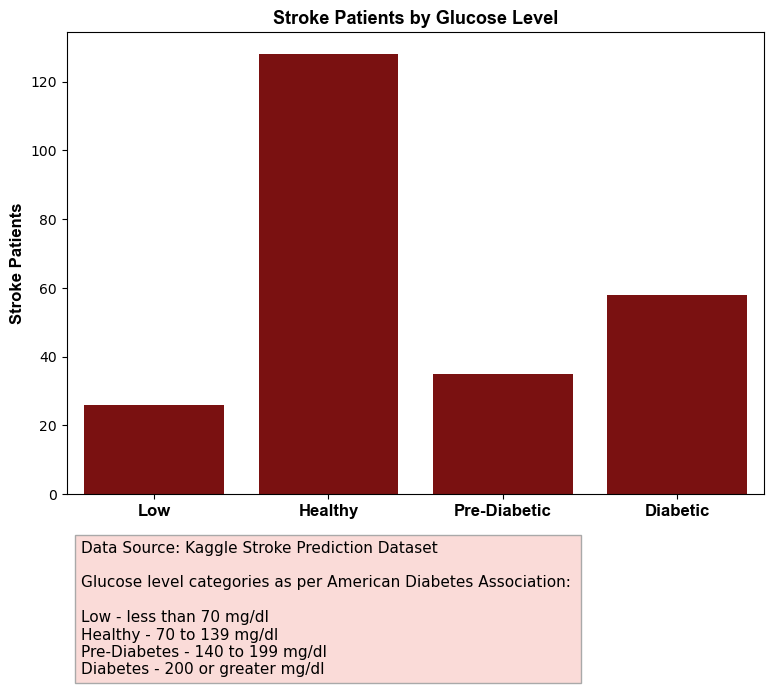

In [26]:
### Code for bar plot representing number of stroke patients by glucose level category

# Define the bins of x-axis labels for glucose level categories (bin parameters set on standards from American Diabetes Society)
# Condenses hundereds of unique glucose level float measurements into more meaningful categories for counting purposes
bins = [0, 70, 140, 200, float('inf')]

# Define the labels for each glucose level bin
labels1 = ['Low', 'Healthy', 'Pre-Diabetic', 'Diabetic']

# Create a glucose_category column
stroke_positive['glucose_category'] = pd.cut(
    stroke_positive['avg_glucose_level'],  
    bins=bins,
    labels=labels1,
    right=False)

# Create a bar count plot with Seaborn
fig, ax1 = plt.subplots(figsize=(9,6))
sns.countplot(
    data=stroke_positive,
    x='glucose_category',
    order=labels1,
    color='darkred',
    ax=ax1)

# Plot titles and labels formatting
ax1.set_title('Stroke Patients by Glucose Level',   #Plot title
              fontsize=13, 
              fontfamily='arial', 
              fontweight='bold')
ax1.set_xlabel('')   # X-axis label - no label required as plot is self explanatory based on title and categories
ax1.set_xticklabels(labels1, # Format x-axis category labels
                    fontsize=12, 
                    fontfamily='arial', 
                    fontweight='bold')
ax1.set_ylabel('Stroke Patients',   # Y-axis label
               fontsize=12, 
               fontfamily='arial',
               fontweight='bold')

# Create text box below plot to indicate data source for data transparency purposes, and to outline bin parameters to provide audience with context
plt.text(
    0.02, -0.1,  # Text positioning from axes
    'Data Source: Kaggle Stroke Prediction Dataset \n' # Text - data source
    '\n'
    'Glucose level categories as per American Diabetes Association: \n' # Text - American Diabetes Society glucose level categories
    '\n'
    'Low - less than 70 mg/dl \n'
    'Healthy - 70 to 139 mg/dl \n'
    'Pre-Diabetes - 140 to 199 mg/dl \n'
    'Diabetes - 200 or greater mg/dl' ,
    transform=plt.gca().transAxes,  # place relative to entire figure
    fontsize=11,
    color='black',
    ha='left',  # Horizontal text alignment inside box
    va='top',   # Vertical text alignment inside box
    bbox=dict(
        facecolor='#FADBD8',   # Light red background
        edgecolor='darkgrey',    # Border color
    )
)

plt.savefig("../images/Stroke Positive Visualizations/stroke_patients_by_glucose.png",  # File name
            dpi=300,                       # Resolution
            bbox_inches='tight')           # Fit all content on paper


plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_380\3256980812.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(labels2,  # Format x-axis category labels


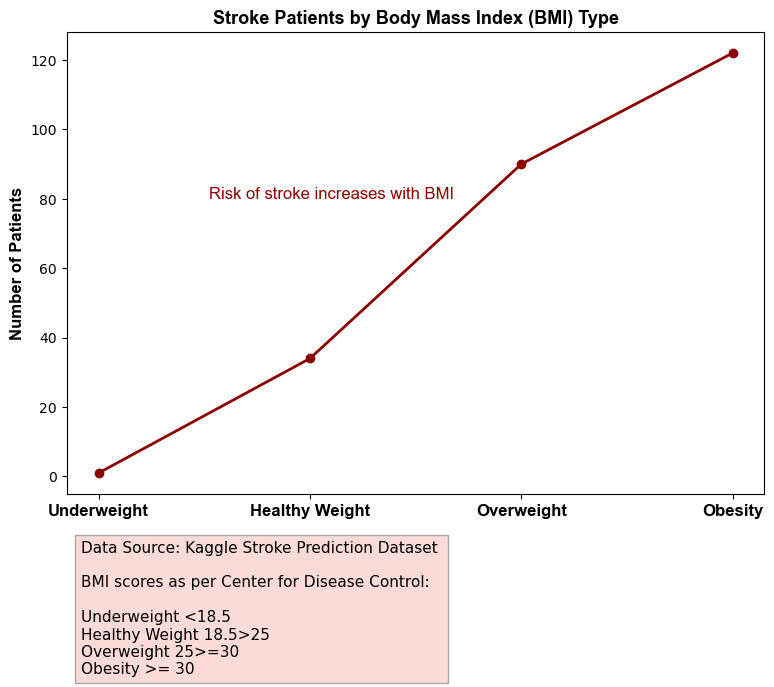

In [27]:
### Code for line plot representing number of stroke patients per Body Mass Index (BMI) type

# Define the bins (boundaries) of x-axis categories
bins = [0, 18.5, 25, 30, float('inf')]

# Define the labels for each bin
labels2 = ['Underweight', 'Healthy Weight', 'Overweight', 'Obesity']

# Count patients by BMI type (ie. Number of patients per BMI category)
bmi_counts = stroke_positive['bmi_category'].value_counts().reindex(labels2)

# Line plot for count of patients by BMI type
fig, ax3 = plt.subplots(figsize=(9,6))
ax3.plot(bmi_counts.index, 
        bmi_counts.values, 
        marker='o',
        color='darkred', 
        linewidth=2,
       )

# Plot titles and labels formatting
ax3.set_title('Stroke Patients by Body Mass Index (BMI) Type', # Plot title
             fontsize=13, 
             fontfamily='arial', 
             fontweight='bold')
ax3.set_xlabel('')  # X-axis label - no label required as plot is self explanatory based on title and categories
ax3.set_xticklabels(labels2,  # Format x-axis category labels
                    fontsize=12, 
                    fontfamily='arial', 
                    fontweight='bold')
ax3.set_ylabel('Number of Patients',   # Y-axis label
              fontsize=12, 
              fontfamily='arial', 
              fontweight='bold')

# Create an annotation to describe to plot output
ax3.annotate(
    'Risk of stroke increases with BMI', # Text
    xy=('Underweight', 85), # Base point (coordinates) for annotation
    xytext=(1.1, 80),   # Test positioning from base point
    fontsize=12,
    color='darkred',
    fontfamily='arial',
    #fontweight='bold',
    ha='center')

# Create text box below plot to indicate data source for data transparency purposes, and to outline bin parameters to provide audience with context
plt.text(
    0.02, -0.1,  # Text positioning from axes
     'Data Source: Kaggle Stroke Prediction Dataset \n' # Text - Data Source
    '\n'
    'BMI scores as per Center for Disease Control: \n' # Text - Center for Disease Control BMI categories
    '\n'
    'Underweight <18.5  \n'
    'Healthy Weight 18.5>25 \n'
    'Overweight 25>=30 \n'
    'Obesity >= 30',
    transform=plt.gca().transAxes,  # place relative to entire figure
    fontsize=11,
    color='black',
    ha='left',  # Horizontal text alignment inside box
    va='top',   # Vertical text alignment inside box
    bbox=dict(
        facecolor='#FADBD8',   # Light red background
        edgecolor='darkgrey',    # Border color
    )
)

plt.savefig("../images/Stroke Positive Visualizations/stroke_patients_by_bmi.png",  # File name
            dpi=300,                       # Resolution
            bbox_inches='tight')           # Fit all content on paper
  

plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_380\3633871228.py:12: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.scatterplot(


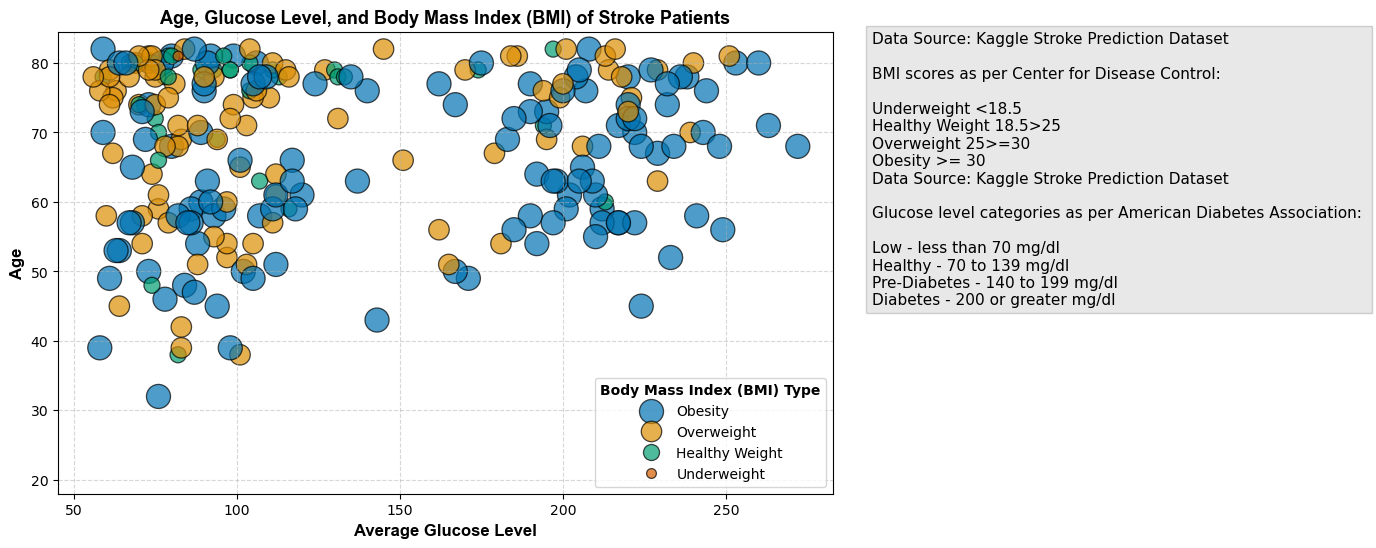

In [28]:
# Code for creating bubble plot chart to represent Age, Glucose Level, and Body Mass Index (BMI) of stroke patients [colorblind friendly version]

# BMI legend order for bubble size - ordered so that 'Obesity' has the largest bubble size and 'Underwieght' has the smallest bubble size
bmi_legend = ['Obesity', 'Overweight', 'Healthy Weight', 'Underweight']

# Use colorblind friendly palette for plot colors (note: this plot chart is not monochromoatic, using this palette increases accessibility for the audience)
# Color palette name retireved from https://seaborn.pydata.org/tutorial/color_palettes.html
colorblind = sns.color_palette("colorblind")

# Create scatter plot for Age, Glucose Level, and BMI features
fig, ax4 = plt.subplots(figsize=(10, 6))
sns.scatterplot(
    data=stroke_positive,   # Dataset being called
    x='avg_glucose_level',  # X-axis: Glucose level
    y='age',                # Y-axis: Age
    size='bmi_category',    # Bubble Size: BMI Type
    sizes=(50, 300),        # Manually assign min and max bubble sizes
    palette=colorblind,     # Bubble colors are based on Seaborn colorblind friendly palette
    hue='bmi_category',     # Distinct bubble colors for each BMI category
    hue_order=bmi_legend,   # Order for bubble colors
    size_order=bmi_legend,  # Order for bubble size
    alpha=0.7,              # Bubble transparency
    edgecolor='black'  # Bubble outline
)

# Plot titles and labels formatting
ax4.set_title('Age, Glucose Level, and Body Mass Index (BMI) of Stroke Patients', # Plot title
          fontsize=13, 
          fontweight='bold', 
          fontfamily='arial')
ax4.set_xlabel('Average Glucose Level', # X-axis Label
           fontsize=12, 
           fontweight='bold', 
           fontfamily='arial')
ax4.set_ylabel('Age', # Y- axis label
           fontsize=12, 
           fontweight='bold', 
           fontfamily='arial')
ax4.set_ylim(18, None) # Start Y-axis at age 18 (dataset only includes adults)

# Legend formatting
plt.legend(title='Body Mass Index (BMI) Type', # Legend title
           title_fontproperties={'weight': 'bold'},
           fontsize=10)

# Add gridlines to plot
plt.grid(True, 
         linestyle='--', 
         alpha=0.5)

# Create text box below plot to indicate data source for data transparency purposes, and to outline bin parameters to provide audience with context
plt.text(
    1.05, 1,  # Text positioning from axes
     'Data Source: Kaggle Stroke Prediction Dataset \n' # Text - Data Source
    '\n'
    'BMI scores as per Center for Disease Control: \n' # Text - Center for Disease Control BMI categories
    '\n'
    'Underweight <18.5  \n'
    'Healthy Weight 18.5>25 \n'
    'Overweight 25>=30 \n'
    'Obesity >= 30 \n'
    'Data Source: Kaggle Stroke Prediction Dataset \n' # Text - data source
    '\n'
    'Glucose level categories as per American Diabetes Association: \n' # Text - American Diabetes Society glucose level categories
    '\n'
    'Low - less than 70 mg/dl \n'
    'Healthy - 70 to 139 mg/dl \n'
    'Pre-Diabetes - 140 to 199 mg/dl \n'
    'Diabetes - 200 or greater mg/dl' ,
    transform=plt.gca().transAxes,  # place relative to entire figure
    fontsize=11,
    color='black',
    ha='left',  # Horizontal text alignment inside box
    va='top',   # Vertical text alignment inside box
    bbox=dict(
        facecolor='lightgrey',   # Light red background,
        alpha=0.5,
        edgecolor='darkgrey',    # Border color
    )
)

plt.savefig("../images/Stroke Positive Visualizations/stroke_patients_bubble.png",  # File name
            dpi=300,                       # Resolution
            bbox_inches='tight')           # Fit all content on paper

plt.show()


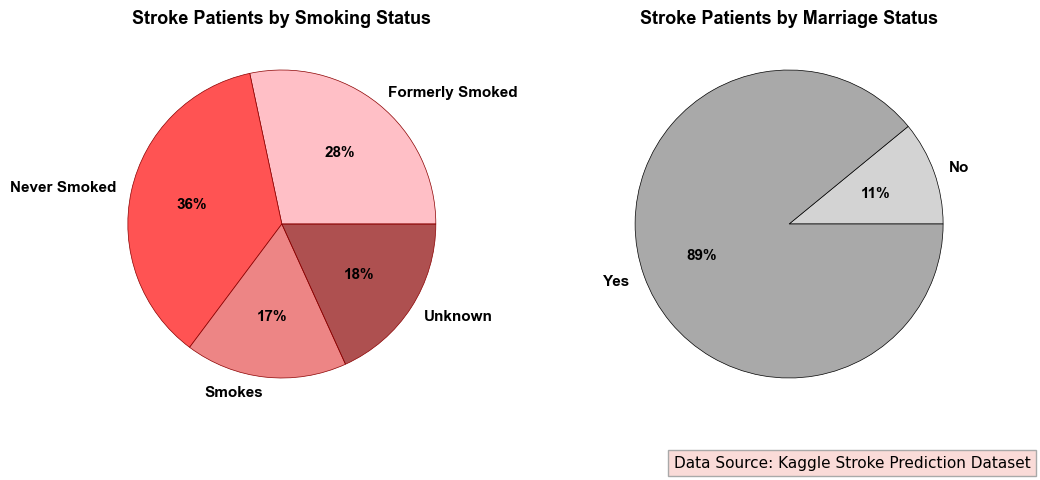

In [29]:
### Code for pie charts representing percent of stroke patients by smoke status and marriage status

# Define figure for two pie charts positioned side by side (ax5: smoking status chart; ax6: marriage status chart)
fig, (ax5, ax6) = plt.subplots(ncols=2, # two charts
                               nrows = 1,
                               figsize=(12,5))

# Replace values in the dataset to standrdize use of titlecase for pie slice labels
stroke_positive['smoking_status'] = stroke_positive['smoking_status'].replace({
    'formerly smoked': 'Formerly Smoked',
    'smokes': 'Smokes',
    'never smoked': 'Never Smoked',
    'Unknown': 'Unknown'
})
# Count patients by smoke status type (ie. number of patients per smoke status type)
smoke_status_counts = stroke_positive['smoking_status'].value_counts().sort_index()

# Pie chart for percent of patients by smoking status
smoke_status_counts.plot(
    kind='pie',
    colors=["#FFBAC1EB",  "#FF4747EF","#EA7171DB", "#890000AF"], # Pie chart slice colors
    wedgeprops={'edgecolor': 'darkred', 'linewidth': 0.5},  # Pie chart/slice outlines
    autopct='%1.0f%%', # Percent labels - No decimal places
    labels=smoke_status_counts.index, # Slice labels - smoke status types 
    textprops={'fontfamily': 'arial', 'fontweight': 'bold', 'fontsize': 11}, # Labels formatting
    ax=ax5 # Formatting applies to chart ax5
    )

# Plot titles and labels formatting
ax5.set_title('Stroke Patients by Smoking Status', # Plot title
          fontweight='bold', 
          fontsize='13', 
          fontfamily='arial')
ax5.set_xlabel('')  # No label required - chart is self explanatory
ax5.set_ylabel('')  # No label required - chart is self explanatory

# Count patients by age (ie. number of patients per age value)
marriage_status_counts = stroke_positive['ever_married'].value_counts().sort_index()

# Pie chart for percent of patients by marriage status
marriage_status_counts.plot(
    kind='pie',
    colors=['lightgrey', 'darkgrey'], # Pie chart slice colors
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5},  # Pie chart/slice outlines
    autopct='%1.0f%%',     # Percent labels - No decimal places
    labels=marriage_status_counts.index,  # Slice labels - marriage status type
    textprops={'fontfamily': 'arial', 'fontweight': 'bold', 'fontsize': 11}, # Labels formatting
    ax=ax6  # Formatting applies to chart ax6
)

# Plot titles and labels formatting
ax6.set_title('Stroke Patients by Marriage Status', # Plot title
          fontweight='bold', 
          fontsize='13', 
          fontfamily='arial')
ax6.set_xlabel('')  # No label required - chart is self explanatory
ax6.set_ylabel('')  # No label required - chart is self explanatory

# Create text box below plot to indicate data source for data transparency purposes
plt.text(
    0.2, -0.1,  # Text positioning from axes
    'Data Source: Kaggle Stroke Prediction Dataset', # Text
    transform=plt.gca().transAxes,  # place relative to entire figure
    fontsize=11,
    color='black',
    ha='left',  # Horizontal text alignment inside box
    va='top',   # Vertical text alignment inside box
    bbox=dict(  # Box style
        facecolor='#FADBD8',   # Light red background
        edgecolor='darkgrey'))   # Border color

plt.savefig("../images/Stroke Positive Visualizations/stroke_patients_categorical(1).png",  # File name
            dpi=300,                       # Resolution
            bbox_inches='tight')           # Fit all content on paper

plt.show()


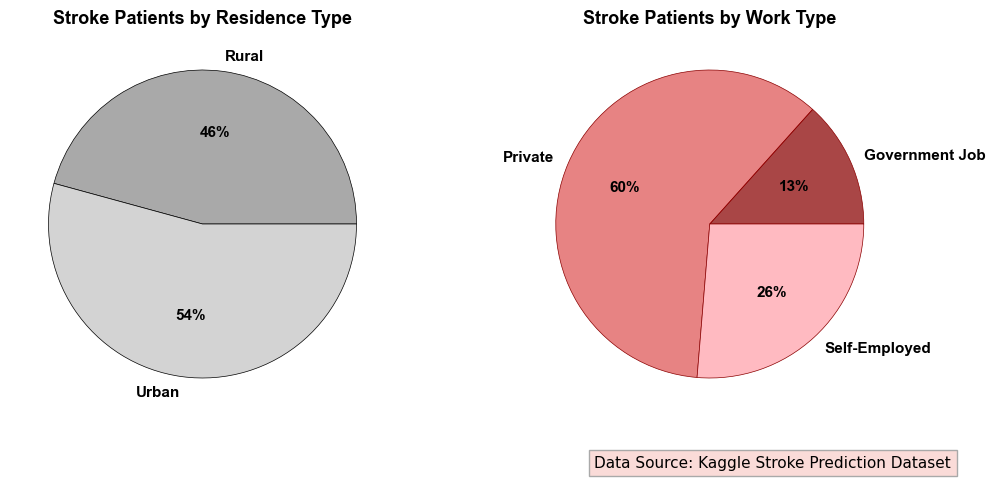

In [30]:
### Code for pie charts representing percent of stroke patients by residence type and work type

# Create subplots for two pie charts
fig, (ax7, ax8) = plt.subplots(ncols=2, nrows=1, figsize=(12,5))

# Count patients by residence type (ie. number of patients per residence type)
residence_type_counts = stroke_positive['residence_type'].value_counts().sort_index()

# Pie chart for percent of patients by residence type
residence_type_counts.plot(
    kind='pie',
    colors=['darkgrey', 'lightgrey'], # Pie chart slice colors
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5},  # Pie chart/slice outlines
    autopct='%1.0f%%',      # Percent labels - No decimal places
    labels=residence_type_counts.index,  # Slice labels - Residence type
    textprops={'fontfamily': 'arial', 'fontweight': 'bold', 'fontsize': 11}, # Slice label formatting
    ax=ax7 # Formatting applies to chart ax7
)

ax7.set_title('Stroke Patients by Residence Type', # Plot title
              fontweight='bold', fontsize=13, fontfamily='arial')
ax7.set_ylabel('') # No label required - chart is self explanatory
ax7.set_xlabel('') # No label required - chart is self explanatory

# Replace values in the dataset to standrdize use of titlecase for pie slice labels
stroke_positive['work_type'] = stroke_positive['work_type'].replace({
    'children': 'Children',
    'Govt_job': 'Government Job',
    'Self-employed': 'Self-Employed'
})

# Count patients by work status type (ie. number of patients per work status type)
work_type_counts = stroke_positive['work_type'].value_counts().sort_index()

# Pie chart for percent of patients by work type
work_type_counts.plot(
    kind='pie',
    colors=["#890000B9","#CE00007C","#FFBAC1", "#FF4747EF", ], # Pie chart slice colors
    wedgeprops={'edgecolor': 'darkred', 'linewidth': 0.5},  # Pie chart/slice outlines
    autopct='%1.0f%%', # Percent labels - No decimal places
    labels=work_type_counts.index, # Slice labels - Work type
    textprops={'fontfamily': 'arial', 'fontweight': 'bold', 'fontsize': 11}, # Slice labels formatting
    ax=ax8 # Formatting applies to chart ax8
)

ax8.set_title('Stroke Patients by Work Type', # Plot title
              fontweight='bold', fontsize=13, fontfamily='arial')
ax8.set_ylabel('') # No label required - chart is self explanatory
ax8.set_xlabel('') # No label required - chart is self explanatory

# Create text box below plot to indicate data source for data transparency purposes
plt.text(
    0.2, -0.1,  # Text positioning from axes
    'Data Source: Kaggle Stroke Prediction Dataset', # Text
    transform=plt.gca().transAxes,  # Place relative to entire figure
    fontsize=11,
    color='black',
    ha='left',  # Horizontal text alignment inside box
    va='top',   # Vertical text alignment inside box
    bbox=dict(  # Box style
        facecolor='#FADBD8',   # Light red background
        edgecolor='darkgrey'))   # Border color

plt.savefig("../images/Stroke Positive Visualizations/stroke_patients_categorical(2).png",  # File name
            dpi=300,                       # Resolution
            bbox_inches='tight')           # Fit all content on paper

plt.show()


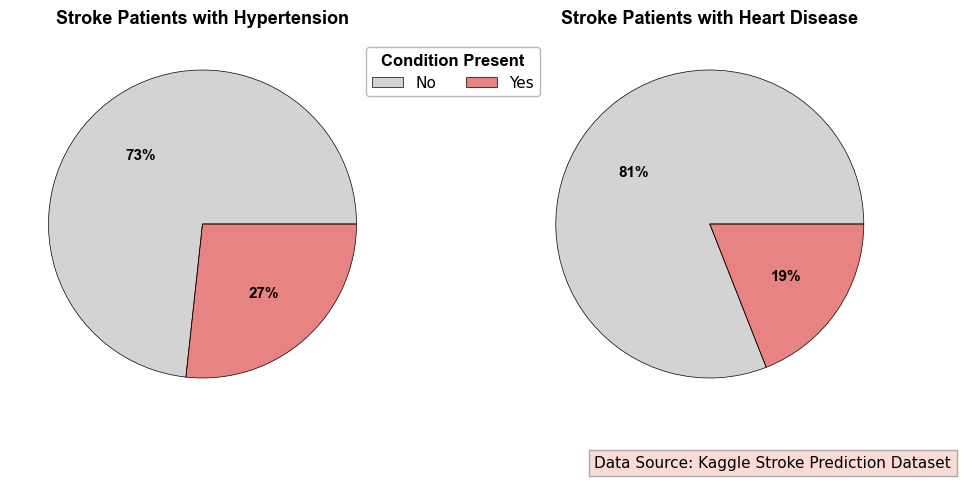

In [31]:
### Code for pie charts representing prevalence of hypertension and heart disease among stroke patients

# Create subplots for two pie charts
fig, (ax9, ax10) = plt.subplots(ncols=2, nrows=1, figsize=(12,5))

# Count patients with hypertension (ie. number of patients with condtion)
hypertension_counts = stroke_positive['hypertension'].value_counts().sort_index()

# Map labels to encoded values to add context for value labels
hypertension_counts.index = hypertension_counts.index.map({0: 'No', 1: 'Yes'})

# Pie chart for prevalence of hypertension among stroke patients
hypertension_counts.plot(
    kind='pie',
    colors=['lightgrey', '#CE00007C'], # Pie chart slice colors
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5},  # Pie chart/slice outlines
    autopct='%1.0f%%',      # Percent labels - No decimal places
    labels= None, # Slice labels turned off - not necessary due to legend
    textprops={'fontfamily': 'arial', 'fontweight': 'bold', 'fontsize': 11}, # Slice percent label formatting
    ax=ax9 # Formatting applies to chart ax9
)

ax9.set_title('Stroke Patients with Hypertension', # Plot title
              fontweight='bold', fontsize=13, fontfamily='arial')
ax9.set_ylabel('') # No label required - chart is self explanatory
ax9.set_xlabel('') # No label required - chart is self explanatory

# Count patients with heart disease (ie. number of patients with condtion)
heart_disease_counts = stroke_positive['heart_disease'].value_counts().sort_index()

# Pie chart for percent of patients by work type
heart_disease_counts.plot(
    kind='pie',
    colors=['lightgrey',"#CE00007C"], # Pie chart slice colors
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5},  # Pie chart/slice outlines
    autopct='%1.0f%%', # Percent labels - No decimal places
    labels= None, # Slice labels turned off - not necessary due to legend
    textprops={'fontfamily': 'arial', 'fontweight': 'bold', 'fontsize': 11}, # Slice percent label formatting
    ax=ax10 # Formatting applies to chart ax10
)

ax10.set_title('Stroke Patients with Heart Disease', # Plot title
              fontweight='bold', fontsize=13, fontfamily='arial')
ax10.set_ylabel('') # No label required - chart is self explanatory
ax10.set_xlabel('') # No label required - chart is self explanatory

# Create a legend for values - indicate whether patients have condtion or not (yes/no)
fig.legend(
    ['No', 'Yes'], # Legend values
    title='Condition Present', # Legend Title
    title_fontproperties={'weight':'bold', 'size':12, 'family':'arial'},
    fontsize=11,
    ncol=2,   # 2 Columns in the legend
    frameon=True, # Legend border
    facecolor='white',
    edgecolor='darkgrey',
    bbox_to_anchor=(0.51, 0.8), # anchor coordinates for legend box
    loc='center'  # center legend
)


# Create text box below plot to indicate data source for data transparency purposes
plt.text(
    0.2, -0.1,  # Text positioning from axes
    'Data Source: Kaggle Stroke Prediction Dataset', # Text
    transform=plt.gca().transAxes,  # Place relative to entire figure
    fontsize=11,
    color='black',
    ha='left',  # Horizontal text alignment inside box
    va='top',   # Vertical text alignment inside box
    bbox=dict(  # Box style
        facecolor='#FADBD8',   # Light red background
        edgecolor='darkgrey'))   # Border color

plt.savefig("../images/Stroke Positive Visualizations/stroke_patients_categorigcal(3).png",  # File name
            dpi=300,                       # Resolution
            bbox_inches='tight')           # Fit all content on paper

plt.show()

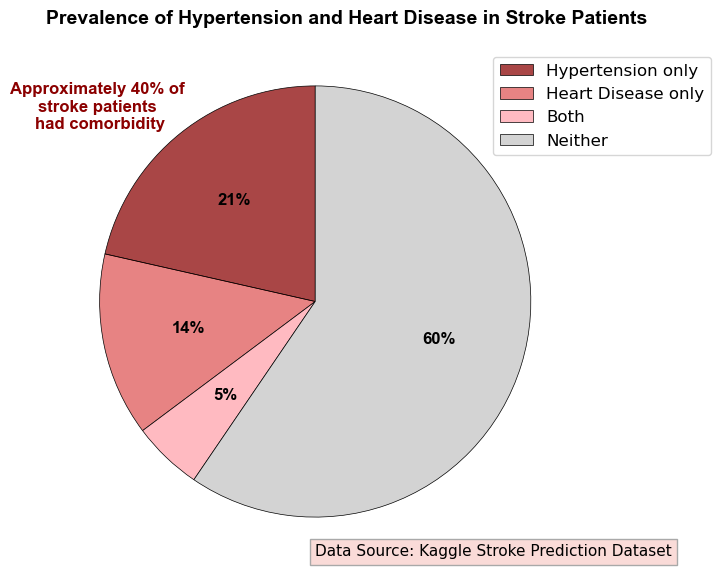

In [32]:
### Code for pie chart representing prevalence of hypertension and heart disease among stroke patients (includes condition for comorbidity)

# Count patients in each condition
counts = {
    'Hypertension only': ((stroke_positive['hypertension'] == 1) & (stroke_positive['heart_disease'] == 0)).sum(),
    'Heart Disease only': ((stroke_positive['hypertension'] == 0) & (stroke_positive['heart_disease'] == 1)).sum(),
    'Both': ((stroke_positive['hypertension'] == 1) & (stroke_positive['heart_disease'] == 1)).sum(),
    'Neither': ((stroke_positive['hypertension'] == 0) & (stroke_positive['heart_disease'] == 0)).sum()
}

# Pie chart for prevalence of conditions among patients
fig, ax11 = plt.subplots(figsize=(7,7))
ax11.pie(
    counts.values(), # Slice values
    labels=None,    # No slice labels required - chart has legend
    textprops={'fontfamily': 'arial', 'fontweight': 'bold', 'fontsize': 12}, # Slice percent label formatting
    colors=["#890000B9","#CE00007C","#FFBAC1", "lightgrey" ], # Slice colors
     wedgeprops={'edgecolor':'black', 'linewidth':0.5}, # Pie chart/slice outlines
    autopct='%1.0f%%',  # Percent labels - No decimal places
    startangle=90 # Dividing pie chart line starts at 90 degrees
    )

# Format pie chart title
ax11.set_title(
    'Prevalence of Hypertension and Heart Disease in Stroke Patients', # Title text
    fontsize=14, 
    fontweight='bold', 
    fontfamily='arial',
    loc='left')

# Add legend
ax11.legend(
    counts.keys(), # Count conditions used as category labels for legend
    title=None, # Not necessary - legend is self-explanatory
    fontsize=12,
    loc='upper right',  # Position legend to the upper right of the pie
    bbox_to_anchor=(1.25, 0.97)  # Cooridnates from anchor position
)

# Create a text annotation beside grouping of conditions to describe chart output
ax11.text(
    -1, 0.8,  # X and Y coordinates (X<0 moves left, Y=0.5 is centered vertically)
    'Approximately 40% of \nstroke patients \nhad comorbidity',
    fontsize=12,
    fontfamily='arial',
    fontweight='bold',
    color='darkred',
    ha='center')

# Create text box below plot to indicate data source for data transparency purposes
plt.text(
    0.5, 0.05,  # Text positioning from axes
    'Data Source: Kaggle Stroke Prediction Dataset', # Text
    transform=plt.gca().transAxes,  # Place relative to entire figure
    fontsize=11,
    color='black',
    ha='left',  # Horizontal text alignment inside box
    va='top',   # Vertical text alignment inside box
    bbox=dict(  # Box style
        facecolor='#FADBD8',   # Light red background
        edgecolor='darkgrey'))   # Border color

plt.savefig("../images/Stroke Positive Visualizations/stroke_patients_comorbidity.png",  # File name
            dpi=300,                       # Resolution
            bbox_inches='tight')           # Fit all content on paper

plt.show()

